In [84]:
import pandas as pd
import pyarrow as py

In [87]:
parquet_file = "../basic-market-cva/outputs/ee2fe98a-cd70-4309-a867-d4d7ed791ef1/runs/root__system__Agents__PricingDesk/run000.parquet"

In [88]:
tempdf = pd.read_parquet(parquet_file, engine='pyarrow')
data = tempdf.to_numpy().flatten().tolist()
df = pd.DataFrame(data)
pd.DataFrame(data)


,cvaPercent,numberOfAssets,price,totalMoney,totalValue,valueAtRisk,_id,seed,tick
0,0.0,100.0,9.9,0.0,0.0,0.0,6,611107144427000,0
1,0.02448359888272273,100.0,9.925,0.0,0.27250000000000385,0.0,6,611107144427000,1
2,0.10750021233453944,100.0,9.9,0.0,0.6302590498751695,0.0,6,611107144427000,2
3,0.35358484386226746,100.0,9.9,0.0,0.4542722064816991,0.0,6,611107144427000,3
4,0.340093779129979,100.0,9.925,0.0,1.1794253883925405,0.0,6,611107144427000,4
...,...,...,...,...,...,...,...,...,...
96,0.4983183070817591,52.0,10.300000000000006,-97.55172047979988,6.477976241795651,0.0,6,611107144427000,96
97,0.4719419661347367,49.0,10.250000000000005,-80.28425532120629,0.8842474814841794,0.0,6,611107144427000,97
98,0.3373249998074663,48.0,10.250000000000005,-83.41557239525287,-1.3708789659953808,0.0,6,611107144427000,98
99,0.49021977561292274,48.0,10.250000000000005,-97.89620250610868,-5.566343103484502,0.0,6,611107144427000,99


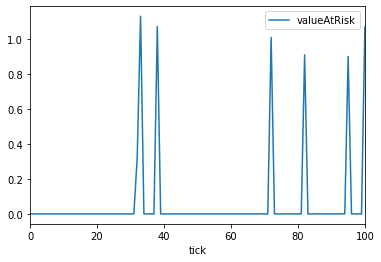

In [89]:
df=df.astype(float)
df.plot(x ='tick', y='valueAtRisk', kind = 'line')